# 1. Importar librerias

In [391]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_validate, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#Importar módulo de funciones
import sys
sys.path.insert(0, 'utils')  # Añadir el directorio 'utils' al PATH
import funciones
from importlib import reload
reload(funciones)  # Recarga el módulo

<module 'funciones' from 'c:\\Users\\Usuario\\OneDrive - Universidad de Antioquia\\Documentos\\Universidad\\Analitica3\\recursos_humanos\\utils\\funciones.py'>

# 2. Obtener datos

#### Importar datos

In [2]:
df_log =pd.read_csv('data/seleccion_log.csv')
df_target =pd.read_csv('data/base_target.csv')
df_anova =pd.read_csv('data/seleccion_anova.csv')

#### Separar variable objetivo y hacer el split

In [4]:
X= df_log
y= df_target.target

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# 3. Busqueda de hiperparametros

## 3.1 Decision Tree Classifier

#### Definir grilla

In [378]:
parameters = {'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30],
              'max_leaf_nodes': [80,90,100,110,120,130,140,200,210,220,230,240,250],
              'min_samples_leaf': [2,3,5,7,9,11,13,15,17,19,21,23],
              'class_weight': [None,'balanced']}

#### Realizar busqueda

In [379]:
dt = DecisionTreeClassifier(random_state=42)
rand_s = GridSearchCV(estimator=dt,
                            param_grid=parameters,
                            n_jobs=-1,
                            scoring='recall',
                            cv=5,
                            verbose=False)
rand_s.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 20, 25, 30],
                         'max_leaf_nodes': [80, 90, 100, 110, 120, 130, 140,
                                            200, 210, 220, 230, 240, 250],
                         'min_samples_leaf': [2, 3, 5, 7, 9, 11, 13, 15, 17, 19,
                                              21, 23]},
             scoring='recall', verbose=False)

#### Modelo con mejores hiperparametros

In [380]:
rand_s.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                       max_leaf_nodes=200, min_samples_leaf=3, random_state=42)

In [381]:
dt_final = rand_s.best_estimator_

#### Evaluación

In [382]:
eval=cross_validate(dt_final,X,y,cv=30,scoring="recall",return_train_score=True)

In [383]:
train_dt=pd.DataFrame(eval['train_score'])
test_dt=pd.DataFrame(eval['test_score'])
df=pd.concat([train_dt,test_dt], axis=1)
df.columns=['train_score','test_score']

In [384]:
df

,train_score,test_score
0,0.996409,1.000000
1,0.996409,0.400000
2,0.998205,0.650000
3,0.998208,0.578947
4,0.998208,0.578947
5,0.998208,0.526316
6,0.996416,0.684211
7,0.998208,0.263158
8,0.998208,0.631579
9,1.000000,0.263158


In [385]:
print(df['test_score'].mean())
df['train_score'].mean()

0.3338596491228071


0.9973104337325106

------------------------------ TRAIN ------------------------------


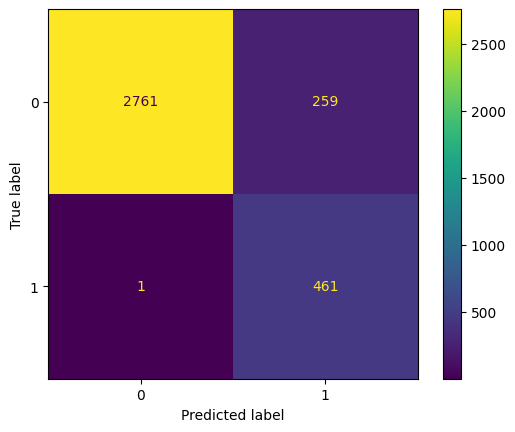

Precision: 0.6402777777777777
Recall: 0.9978354978354979
Especificidad: 0.9142384105960265
F1 score: 0.7800338409475466
Train score:  0.9253302699597932


(0.6402777777777777,
 0.9978354978354979,
 0.9142384105960265,
 0.7800338409475466)

In [386]:
funciones.metricas(dt_final,X_train,y_train,'TRAIN')

------------------------------ TEST ------------------------------


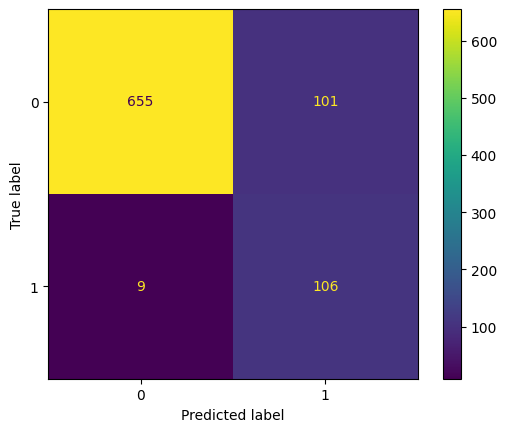

Precision: 0.5120772946859904
Recall: 0.9217391304347826
Especificidad: 0.8664021164021164
F1 score: 0.6583850931677019
Train score:  0.8737083811710677


(0.5120772946859904,
 0.9217391304347826,
 0.8664021164021164,
 0.6583850931677019)

In [388]:
funciones.metricas(dt_final,X_test,y_test,'TEST')

# 3.2 Logistic Regression

In [332]:
lr=LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1, random_state=42)

In [333]:
lr.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1,
                   random_state=42)

In [334]:
eval2=cross_validate(lr,X,y,cv=30,scoring="recall",return_train_score=True)

In [335]:
train_lr=pd.DataFrame(eval2['train_score'])
test_lr=pd.DataFrame(eval2['test_score'])
df2=pd.concat([train_lr,test_lr], axis=1)
df2.columns=['train_score','test_score']

In [336]:
print(df2['test_score'].mean())
df2['train_score'].mean()

0.6621929824561404


0.7073459542823068

------------------------------ TRAIN ------------------------------


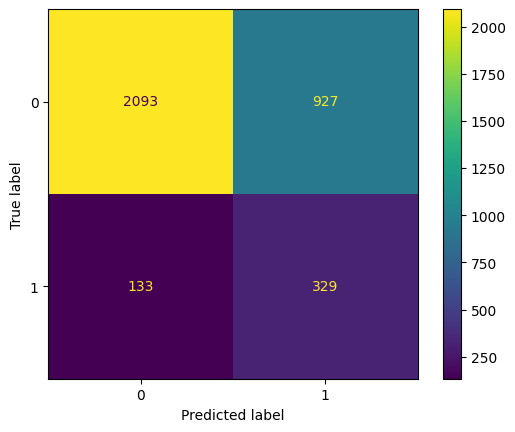

Precision: 0.2619426751592357
Recall: 0.7121212121212122
Especificidad: 0.6930463576158941
F1 score: 0.3830034924330617
Train score:  0.6955772544514647


(0.2619426751592357,
 0.7121212121212122,
 0.6930463576158941,
 0.3830034924330617)

In [337]:
funciones.metricas(lr,X_train,y_train,'TRAIN')

------------------------------ TEST ------------------------------


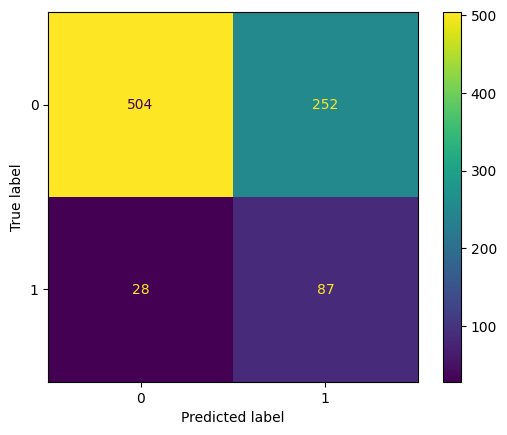

Precision: 0.25663716814159293
Recall: 0.7565217391304347
Especificidad: 0.6666666666666666
F1 score: 0.3832599118942731
Train score:  0.6785304247990815


(0.25663716814159293,
 0.7565217391304347,
 0.6666666666666666,
 0.3832599118942731)

In [338]:
funciones.metricas(lr,X_test,y_test,'TEST')

# 3.3 Random forest classifier

In [282]:
parameters = {'max_depth': [None,60,70,80],
              'max_features': [0.8,0.9,1],
              'max_leaf_nodes': [140,150,160,170,180,190,200],
              'min_samples_leaf': [2,3,5],
              'n_estimators': [800],
              'class_weight': [None,'balanced']}

In [283]:
ranfor = RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced')

rand_s = RandomizedSearchCV(estimator=ranfor,
                            param_distributions=parameters,
                            n_iter=50,
                            scoring='f1',
                            cv=5,
                            verbose=1,
                            n_jobs=-1
                            )
rand_s.fit(X_train, y_train)

c:\Users\Usuario\OneDrive - Universidad de Antioquia\Documentos\Universidad\Analitica3\recursos_humanos\entorno\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 2 is smaller than n_iter=50. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1,
                                                    random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'max_depth': [70],
                                        'max_features': [0.8],
                                        'max_leaf_nodes': [170],
                                        'min_samples_leaf': [2],
                                        'n_estimators': [800]},
                   scoring='f1', verbose=1)

In [284]:
rand_s.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=70, max_features=0.8,
                       max_leaf_nodes=170, min_samples_leaf=2, n_estimators=800,
                       n_jobs=-1, random_state=42)

In [285]:
rf=rand_s.best_estimator_

In [286]:
eval3=cross_validate(rf,X,y,cv=10,scoring="recall",return_train_score=True)


In [287]:
train_rf=pd.DataFrame(eval3['train_score'])
test_rf=pd.DataFrame(eval3['test_score'])
df3=pd.concat([train_rf,test_rf], axis=1)
df3.columns=['train_score','test_score']

In [288]:
df3

,train_score,test_score
0,0.998073,0.862069
1,1.000000,0.396552
2,1.000000,0.551724
3,1.000000,0.087719
4,0.996154,0.052632
5,0.998077,0.035088
6,0.998073,0.017241
7,1.000000,0.051724
8,0.998073,0.034483
9,0.998073,0.086207


In [289]:
print(df3['test_score'].mean())
df3['train_score'].mean()

0.21754385964912282


0.9986523640136357

------------------------------ Train ------------------------------


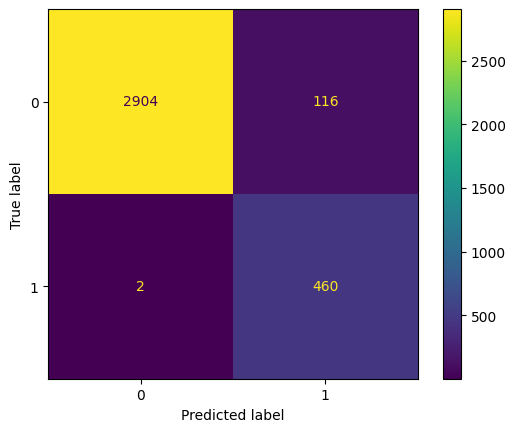

Precision: 0.7986111111111112
Recall: 0.9956709956709957
Especificidad: 0.9615894039735099
F1 score: 0.8863198458574182
Train score:  0.9661114302125215


(0.7986111111111112,
 0.9956709956709957,
 0.9615894039735099,
 0.8863198458574182)

In [290]:
funciones.metricas(rf,X_train,y_train,'Train')

------------------------------ TEST ------------------------------


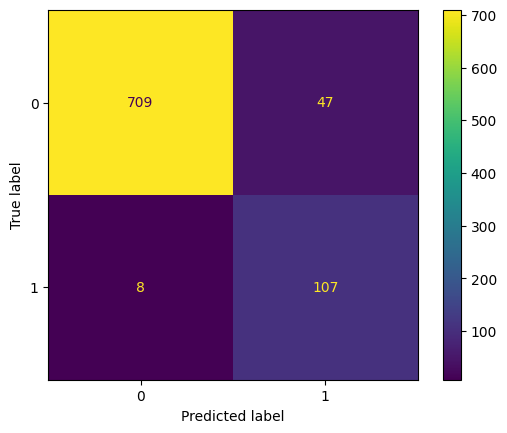

Precision: 0.6948051948051948
Recall: 0.9304347826086956
Especificidad: 0.9378306878306878
F1 score: 0.7955390334572491
Train score:  0.9368541905855339


(0.6948051948051948,
 0.9304347826086956,
 0.9378306878306878,
 0.7955390334572491)

In [291]:
funciones.metricas(rf,X_test,y_test,'TEST')

# 3.4 Gradient boosting

In [389]:
parameters = {'max_depth': [None,50,60,70,90],
              'max_features': [0.8,0.9,1],
              'max_leaf_nodes': [110,120,130,140,150],
              'min_samples_leaf': [2,3,5,7,9],
              'n_estimators': [800],
              'learning_rate': [0.01,0.05,0.1,0.2]}

In [392]:
gb= GradientBoostingClassifier(random_state=42)

rand_s = RandomizedSearchCV(estimator=gb,
                            param_distributions=parameters,
                            n_iter=50,
                            scoring='f1',
                            cv=5,
                            verbose=False)
rand_s.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=50,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [None, 50, 60, 70, 90],
                                        'max_features': [0.8, 0.9, 1],
                                        'max_leaf_nodes': [110, 120, 130, 140,
                                                           150],
                                        'min_samples_leaf': [2, 3, 5, 7, 9],
                                        'n_estimators': [800]},
                   scoring='f1', verbose=False)

In [393]:
rand_s.best_estimator_

GradientBoostingClassifier(learning_rate=0.2, max_depth=90, max_features=0.8,
                           max_leaf_nodes=120, min_samples_leaf=9,
                           n_estimators=800, random_state=42)

In [394]:
gbc=rand_s.best_estimator_

In [395]:
eval4=cross_validate(gbc,X,y,cv=10,scoring="recall",return_train_score=True)

In [396]:
train_gbc=pd.DataFrame(eval4['train_score'])
test_gbc=pd.DataFrame(eval4['test_score'])
df3=pd.concat([train_gbc,test_gbc], axis=1)
df3.columns=['train_score','test_score']

In [397]:
print(df3['test_score'].mean())
df3['train_score'].mean()

0.10021173623714456


0.9813194753223655